In [58]:
import numpy as np 
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score as f1_score_model

In [59]:
datacsv = pd.read_csv('./smoke.csv',index_col = False)
data_set = datacsv.copy()

In [60]:
data_set.sample(10)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
55630,55630,1654716675,52.950,21.70,30424,734,12638,18780,936.900,0.72,0.75,4.94,0.770,0.017,4488,0
62181,62181,1655129603,-21.950,11.99,60000,1217,12388,17970,936.717,189.45,208.85,1273.73,217.707,16.259,5295,0
11789,11789,1654745120,14.834,47.07,1044,596,12823,19472,939.094,2.07,2.15,14.22,2.218,0.050,11789,1
43885,43885,1654780234,24.540,53.49,1186,415,12913,19433,938.700,1.49,1.55,10.28,1.603,0.036,18891,1
56861,56861,1654717906,46.630,15.75,604,400,13741,20584,936.681,0.62,0.65,4.29,0.669,0.015,5719,0
51346,51346,1654712391,28.570,44.61,51,408,12851,20722,937.580,2.18,2.26,15.00,2.340,0.053,204,0
1376,1376,1654734707,26.486,49.40,2,400,13098,19995,939.712,0.40,0.42,2.77,0.431,0.010,1376,0
39123,39123,1654775472,27.120,47.00,1097,490,12856,19456,938.915,2.06,2.14,14.17,2.210,0.050,14129,1
61755,61755,1655129177,-0.120,31.24,60000,1660,12191,18012,936.878,225.18,233.95,1549.82,241.676,5.458,4869,0
39117,39117,1654775466,27.060,47.23,1046,481,12859,19465,938.901,2.03,2.11,13.96,2.178,0.049,14123,1


In [61]:
data_set.shape

(62630, 16)

In [62]:
data_set.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [63]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [64]:
data_set.isna().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

<AxesSubplot:>

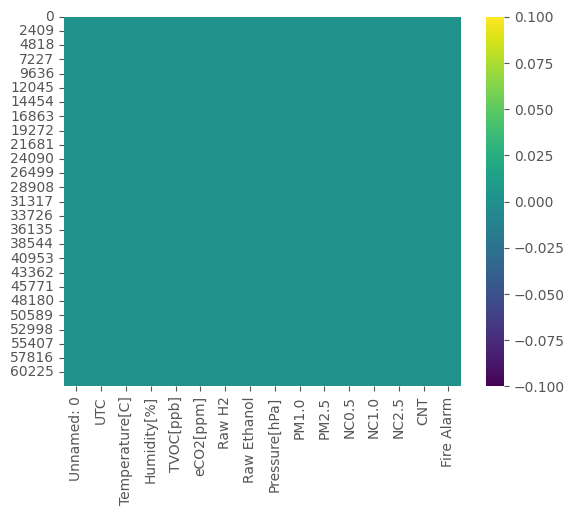

In [65]:
sns.heatmap(data_set.isnull(), cmap='viridis')

In [66]:
# Remove first unnamed column

data_set = data_set.drop(['Unnamed: 0'], axis = 1)

In [67]:
# check wrong entries such as special symbols e.g *,#,-,?,$ etc.
for col in data_set.columns:
    print('{} : {}'.format(col, data_set[col].unique()))

UTC : [1654733331 1654733332 1654733333 ... 1655130049 1655130050 1655130051]
Temperature[C] : [20.    20.015 20.029 ... 15.714 16.333 16.957]
Humidity[%] : [57.36 56.67 55.96 ... 16.59 15.99 15.84]
TVOC[ppb] : [  0  30  36 ... 513 517 643]
eCO2[ppm] : [ 400  403  406 ... 1365 1013  948]
Raw H2 : [12306 12345 12374 ... 13727 13718 13731]
Raw Ethanol : [18520 18651 18764 ... 20413 20468 20482]
Pressure[hPa] : [939.735 939.744 939.738 ... 936.635 936.642 936.659]
PM1.0 : [0.   0.9  0.89 ... 4.98 4.57 3.62]
PM2.5 : [0.   3.78 3.71 ... 5.17 4.04 3.76]
NC0.5 : [ 0.    0.14  0.13 ... 26.73 24.89 19.27]
NC1.0 : [0.    4.369 4.289 ... 3.881 0.641 0.731]
NC2.5 : [0.    2.78  2.73  ... 0.202 0.16  0.121]
CNT : [    0     1     2 ... 24991 24992 24993]
Fire Alarm : [0 1]


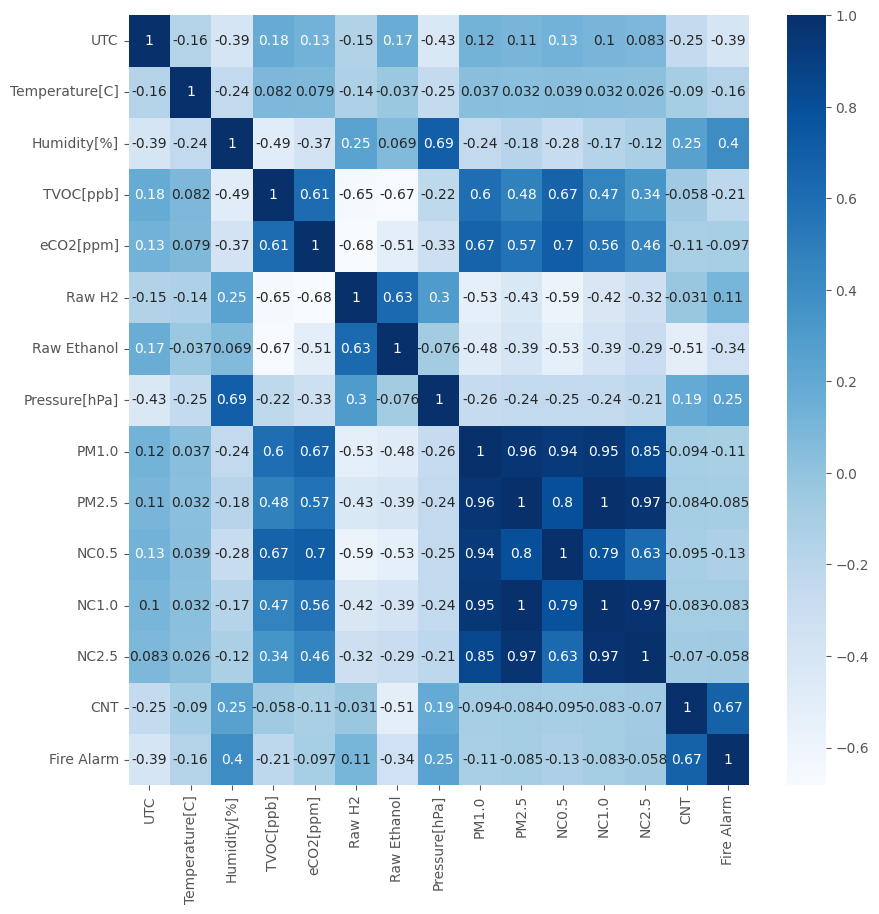

In [68]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(data_set.corr(), cbar=True, annot=True, cmap='Blues')
fig.savefig("matrix.png")

Note: Since we remove columns UTC and CNT the reason is that looking at the dataset UTC and CNT does not impact fire causes. so we will select from 'temperature - NC2.5'.

In [69]:
inputs = list(data_set.columns)[1:-2]
targets = ['Fire Alarm']

In [70]:
training_x = data_set[inputs].copy()
training_y = data_set[targets].copy()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(training_x, training_y, test_size=0.2,random_state=43)

In [72]:
X_train.shape

(50104, 12)

In [73]:
X_test.shape

(12526, 12)

In [74]:
X_train.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
36061,26.180,49.07,1034,651,12798,19472,939.114,2.07,2.15,14.27,2.226,0.050
45953,26.850,47.87,1343,414,12943,19387,938.693,1.75,1.81,12.02,1.875,0.042
23467,-20.914,50.19,1400,404,12974,19383,938.694,2.03,2.11,13.97,2.179,0.049
13899,18.203,51.42,1105,502,12846,19451,938.913,2.44,2.54,16.82,2.622,0.059
43215,24.820,52.36,1218,427,12901,19422,938.716,1.74,1.81,11.97,1.866,0.042


### Scaling the Features (Normalization)<a class="anchor" id="normalization"></a>

To Improve model accurace we normalize the dataset. 
Normalization helps to give equal importance to each vairable so not a single variable is resposponsible to boost the model performance in one direction only because it is big.

In [75]:
scaler = MinMaxScaler().fit(data_set[inputs])

X_train[inputs] = scaler.transform(X_train[inputs])
X_test[inputs] = scaler.transform(X_test[inputs])

In [76]:
X_test.describe().loc[['min', 'max']]

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
min,0.000000,0.000000,0.0,0.000000,0.003509,0.00837,0.001665,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.997437,0.995191,1.0,0.958507,0.999362,1.00000,0.999445,0.966891,0.934358,0.956456,0.932732,0.918014


In [77]:
y_train

,Fire Alarm
36061,1
45953,1
23467,1
13899,1
43215,1
...,...
59669,0
40753,1
51455,0
19776,1


Now we have our normalize data. Next we need to train our model for prediction

In [78]:
# This function evaluates the train dataset
def accuracy_model(models):
    model_name = []
    confusion_metrx = []
    execution_time = []
    score_data = []
    auc_data = []
    f1_score = []
    accuracy_score_data = []
    
    for model in models:
        
        start_time = time.time()
        model.fit(X_train, y_train.values.ravel())
        end_time = time.time()
        
        model_name.append(type(model).__name__)

        # model prediction
        model_prediction = model.predict(X_train)

        # model_score
        modelscore_train_preds = model.score(X_train, y_train)
        score_data.append(modelscore_train_preds)

        # Accuracy_score metrix
        as_train_acc = accuracy_score(y_train, model_prediction)
        accuracy_score_data.append(as_train_acc)

        # confusion metrix
        cf_train_acc = confusion_matrix(y_train, model_prediction)
        confusion_metrx.append(cf_train_acc)

        #Area under curve
        auc_train_acc = roc_auc_score(y_train, model_prediction)
        auc_data.append(auc_train_acc)

        # f1 score
        f1_train = f1_score_model(y_train, model_prediction)
        f1_score.append(f1_train)
        
        execution_time.append(end_time-start_time)

        Dict = {'Model':model_name,
                'Execution Time(sec)':execution_time,
                'Model Score':score_data, 
                'Confusion Metrx':confusion_metrx,
                'AUC':auc_data,
                'F1 Score ':f1_score, 
                'Accuracy Score':accuracy_score_data}
    return pd.DataFrame(Dict) 

In [79]:
# Evalution 
def test_acc_model(models):
    score_data = []
    f1_score = []
    accuracy_score_data = []
    model_name = []
    confusion_metrx = []
    imp_features = []
    execution_time = []
    auc_data = []
    
    for model in models:
        start_time = time.time()
        model.fit(X_train, y_train.values.ravel())
        end_time = time.time()
        try:
            imp_features.append(pd.DataFrame({
                (str(model) + ': Features'): X_train.columns,
                'Importance': model.feature_importances_
            }).sort_values('Importance', ascending=False))
        except Exception as e:
            print(e)
            pass
        
        model_name.append(type(model).__name__)

        # Predict model
        pred_model = model.predict(X_test)

        # Score of model
        model_score = model.score(X_test, y_test)
        score_data.append(model_score)

        # Accuracy score
        as_test_acc = accuracy_score(y_test, pred_model)
        accuracy_score_data.append(as_test_acc)

        # Confusion metrix
        confustion_test_acc = confusion_matrix(y_test, pred_model)
        confusion_metrx.append(confustion_test_acc)

        # Area under curve
        auc_test = roc_auc_score(y_test, pred_model)
        auc_data.append(auc_test)

        # F1 score
        f1_test = f1_score_model(y_test, pred_model)
        f1_score.append(f1_test)
        
        execution_time.append(end_time-start_time)

    Dict = {'Model':model_name,
            'Execution Time(sec)':execution_time,
            'Model Score':model_score, 
            'Confusion Metrx':confusion_metrx,
            'AUC':auc_data,
            'F1 Score ':f1_score, 
            'Accuracy Score':accuracy_score}
    
    return pd.DataFrame(Dict), imp_features

In [80]:
models = [
    MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
    LogisticRegression(solver='lbfgs', max_iter=1000), 
    GradientBoostingClassifier(), 
    AdaBoostClassifier(), 
    RandomForestClassifier(n_estimators = 100),
    ExtraTreeClassifier(), 
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier()
]

In [81]:
accuracy_model(models)

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,Model,Execution Time(sec),Model Score,Confusion Metrx,AUC,F1 Score,Accuracy Score
0,MLPClassifier,6.008705,0.907512,"[[11520, 2837], [1797, 33950]]",0.876063,0.936113,0.907512
1,LogisticRegression,0.460878,0.884101,"[[10020, 4337], [1470, 34277]]",0.828398,0.921908,0.884101
2,GradientBoostingClassifier,8.152323,0.999840,"[[14353, 4], [4, 35743]]",0.999805,0.999888,0.999840
3,AdaBoostClassifier,1.660310,0.999621,"[[14343, 14], [5, 35742]]",0.999442,0.999734,0.999621
4,RandomForestClassifier,2.862586,1.000000,"[[14357, 0], [0, 35747]]",1.000000,1.000000,1.000000
5,ExtraTreeClassifier,0.009614,1.000000,"[[14357, 0], [0, 35747]]",1.000000,1.000000,1.000000
6,DecisionTreeClassifier,0.118397,1.000000,"[[14357, 0], [0, 35747]]",1.000000,1.000000,1.000000
7,GaussianNB,0.004751,0.764330,"[[3404, 10953], [855, 34892]]",0.606589,0.855280,0.764330
8,KNeighborsClassifier,0.014763,0.999002,"[[14326, 31], [19, 35728]]",0.998655,0.999301,0.999002


In [82]:
testing_accuracy, imp_features = test_acc_model(models)

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


'MLPClassifier' object has no attribute 'feature_importances_'
'LogisticRegression' object has no attribute 'feature_importances_'
'GaussianNB' object has no attribute 'feature_importances_'
'KNeighborsClassifier' object has no attribute 'feature_importances_'


In [83]:
testing_accuracy

,Model,Execution Time(sec),Model Score,Confusion Metrx,AUC,F1 Score,Accuracy Score
0,MLPClassifier,2.387607,0.998563,"[[2827, 689], [483, 8527]]",0.875216,0.935696,<function accuracy_score at 0x13e5680d0>
1,LogisticRegression,0.236364,0.998563,"[[2454, 1062], [386, 8624]]",0.827555,0.922550,<function accuracy_score at 0x13e5680d0>
2,GradientBoostingClassifier,7.931486,0.998563,"[[3514, 2], [1, 9009]]",0.999660,0.999834,<function accuracy_score at 0x13e5680d0>
3,AdaBoostClassifier,1.682718,0.998563,"[[3514, 2], [2, 9008]]",0.999605,0.999778,<function accuracy_score at 0x13e5680d0>
4,RandomForestClassifier,2.917730,0.998563,"[[3516, 0], [0, 9010]]",1.000000,1.000000,<function accuracy_score at 0x13e5680d0>
5,ExtraTreeClassifier,0.007869,0.998563,"[[3512, 4], [5, 9005]]",0.999154,0.999501,<function accuracy_score at 0x13e5680d0>
6,DecisionTreeClassifier,0.115106,0.998563,"[[3516, 0], [0, 9010]]",1.000000,1.000000,<function accuracy_score at 0x13e5680d0>
7,GaussianNB,0.004785,0.998563,"[[834, 2682], [223, 8787]]",0.606226,0.858147,<function accuracy_score at 0x13e5680d0>
8,KNeighborsClassifier,0.015410,0.998563,"[[3504, 12], [6, 9004]]",0.997961,0.999001,<function accuracy_score at 0x13e5680d0>


### Feature Importance <a class="anchor" id="f_importance"></a>

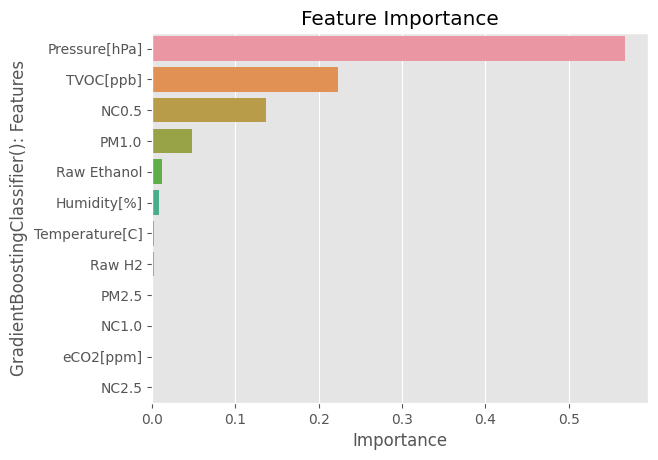

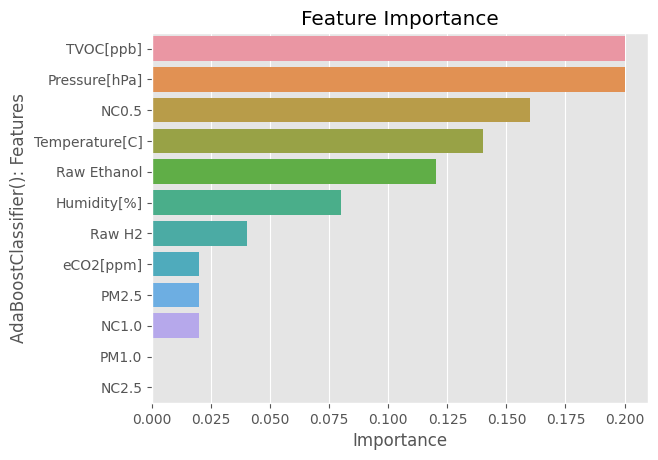

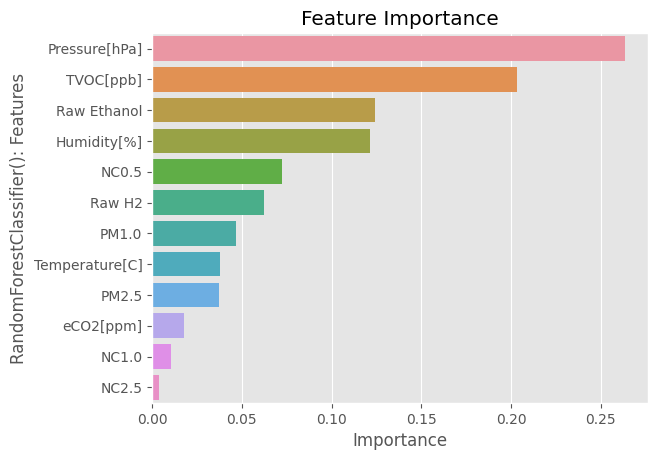

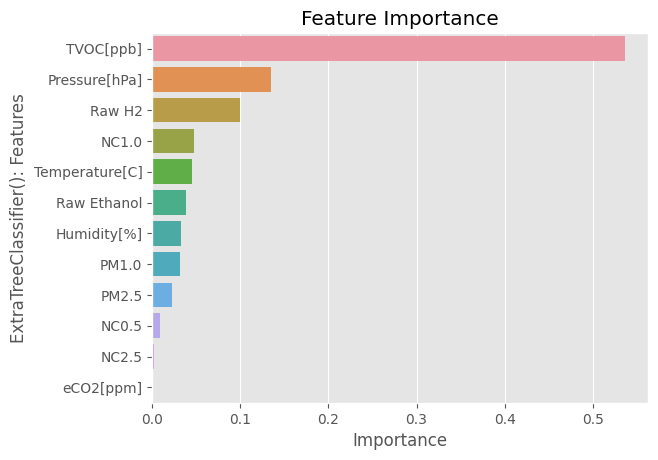

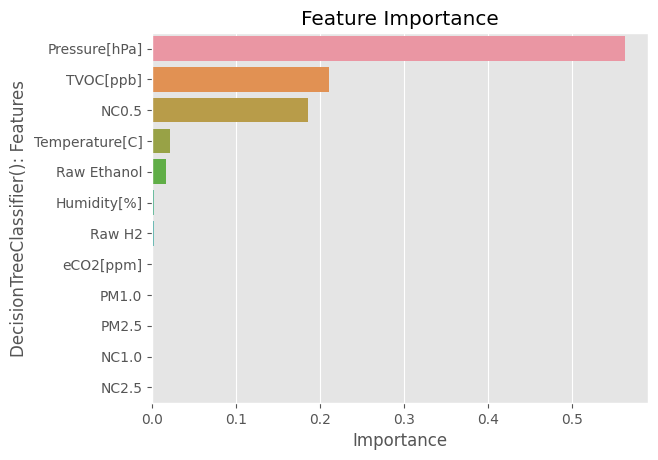

In [85]:
for each_model in range(len(imp_features)):
    plt.title('Feature Importance')
    axis = sns.barplot(data=imp_features[each_model], x='Importance', y = imp_features[each_model].columns[0]);
    fig = axis.get_figure()
    plt.show()
    model = imp_features[each_model].columns[0]
    fig.savefig("FeatureImportance{}.png".format(imp_features[each_model].columns[0])) 

### Conclusion <a class="anchor" id="conclusion"></a>

In [86]:
KFModel = StratifiedKFold(n_splits=5)
p_rf= np.zeros(training_y.shape[0])

In [87]:
seed = 50
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

In [88]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ANN', MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)))

In [89]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
        crossvalid_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
        results.append(crossvalid_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, crossvalid_results.mean(), crossvalid_results.std())
        print(msg)

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

LR: 0.873704 (0.011949)


/opt/homebrew/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/homebrew/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/homebrew/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/homebrew/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

KNN: 0.996088 (0.001869)
Decision tree: 0.999042 (0.001118)
NB: 0.766806 (0.011545)


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

ANN: 0.914813 (0.027710)


/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


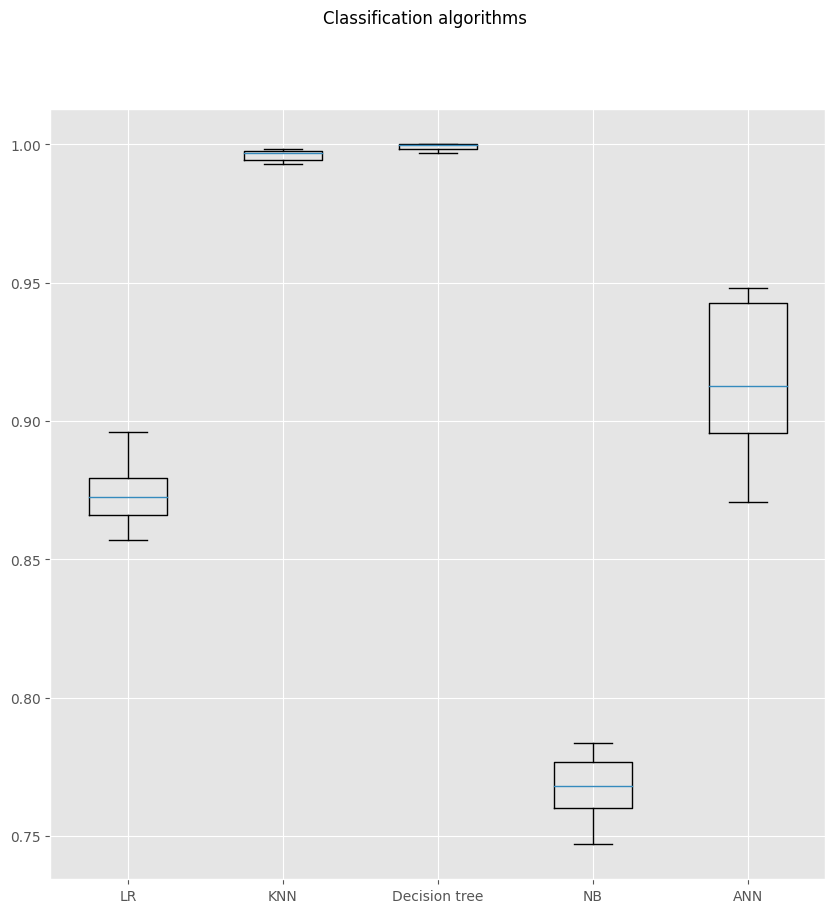

In [90]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('comparison.png')
plt.show()

In [91]:
print("CONFUSTION MATRIX")
for n in range(10,100,10):
    for train,test in KFModel.split(training_x,training_y):
        X_train,X_test,Y_train,Y_test = train_test_split(training_x,training_y,test_size=0.2,random_state=33)
        classifier_gb = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10)
        classifier_gb.fit(X_train,Y_train.values.ravel())
        Y_pred = classifier_gb.predict(X_test)
        conf_mat=confusion_matrix(Y_test,Y_pred)
        
        print(conf_mat)
    print('Score for n:','',accuracy_score(Y_test,Y_pred))

CONFUSTION MATRIX
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
Score for n:  0.9996806642184257
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
Score for n:  0.9996806642184257
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
Score for n:  0.9996806642184257
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
Score for n:  0.9996806642184257
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
Score for n:  0.9996806642184257
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
[[3623    2]
 [   2 8899]]
Score f